<a href="https://colab.research.google.com/github/M-Raghavi/Data-Science-Projects/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer_Churn_Prediction


📊 What is this dataset?

It contains data of 10,000 customers from a bank. The goal is to predict if a customer will leave the bank (churn) or not.

🔑
Column Name - What it Means

customer_id  	- Unique ID (not used for prediction),
credit_score	- Credit score of the customer,
country	      - Country (France, Spain, Germany),
gender	      - Male or Female,
age	          - Age of the customer,
tenure	      - Years the customer has stayed with the bank,
balance	      - Bank balance,
products_number	 - Number of bank products used,
credit_card	- Has a credit card (1 = Yes, 0 = No),
active_member -	Uses bank services actively (1 = Yes, 0 = No),
estimated_salary -	Salary estimate,
churn	Target: 1 = left the bank, 0 = stayed

🎯 Goal:

Understand how data can help retain customers.

what it does:

predicts which customers are likely to leave a service based on historical data.

🧠 Why it's useful:

Helps the bank identify customers who might leave.
The bank can then offer them support or benefits to stay.

#  Step 1: Import Required Libraries

In [41]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Dataset


In [42]:
df = pd.read_csv("/content/Bank Customer Churn Prediction.csv")
df


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#  Step 3: Basic Information(EDA)

In [43]:
#Check for missing values, data types, and basic statistics.
#print first five rows
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
#print last five rows
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [45]:
#Data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [46]:
#description about dataset
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [47]:
#print churn count
df['churn'].value_counts()

,count
churn,
0,7963
1,2037


In [48]:
#print column list
df.columns.tolist()

['customer_id',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

In [49]:
# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [50]:
#Dimension of dataset
df.shape

(10000, 12)

In [51]:
#convert categorical to numerical values
df = pd.get_dummies(df, drop_first=True)

#  Step 4: Visualize Target Variable


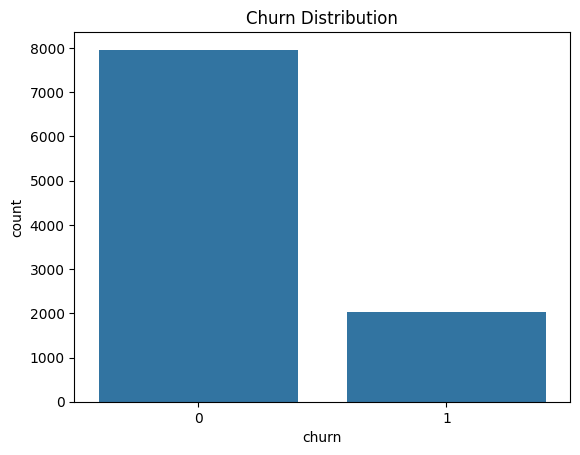

In [52]:
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

# Step 5: Correlation Heatmap

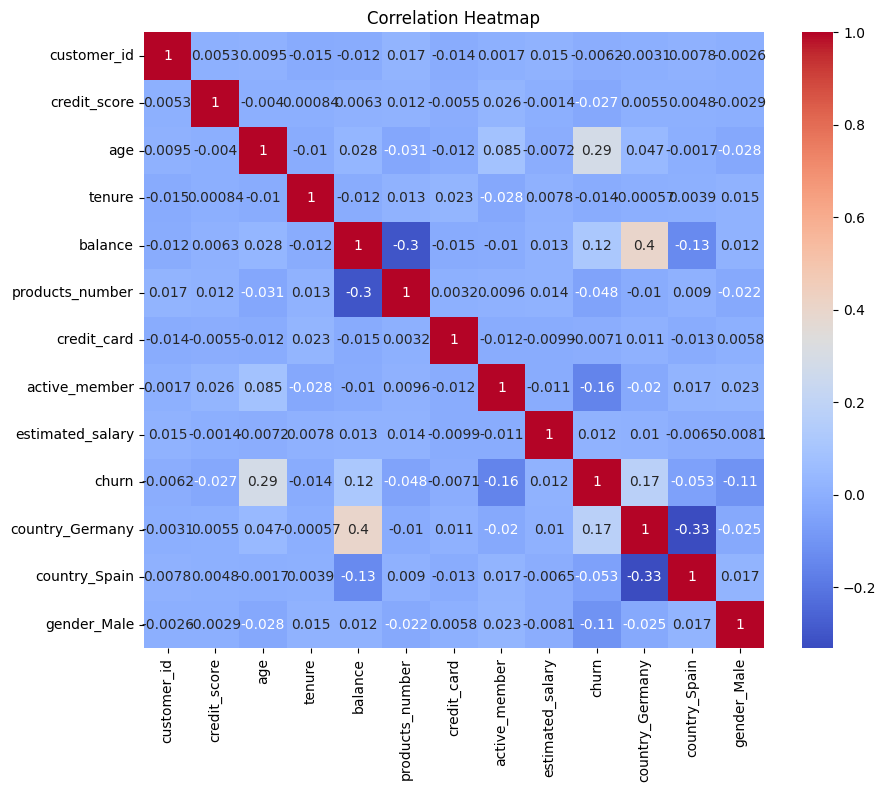

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


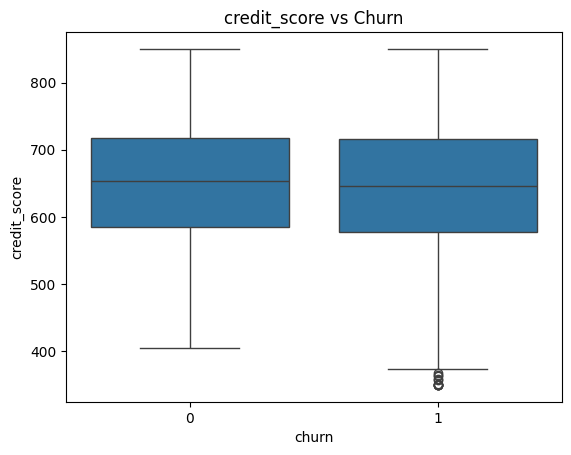

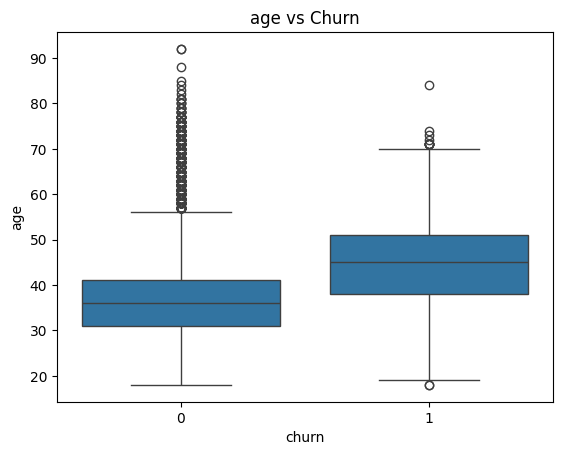

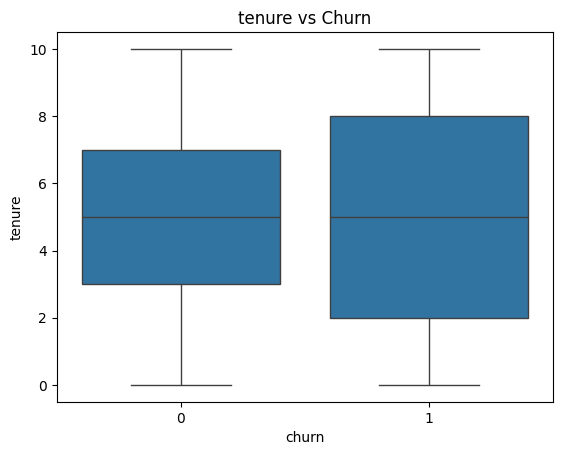

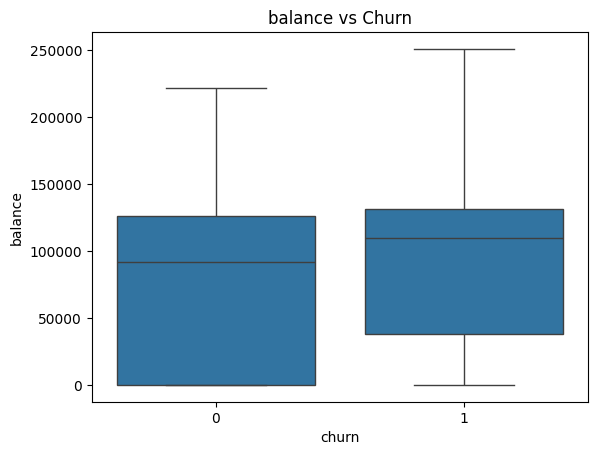

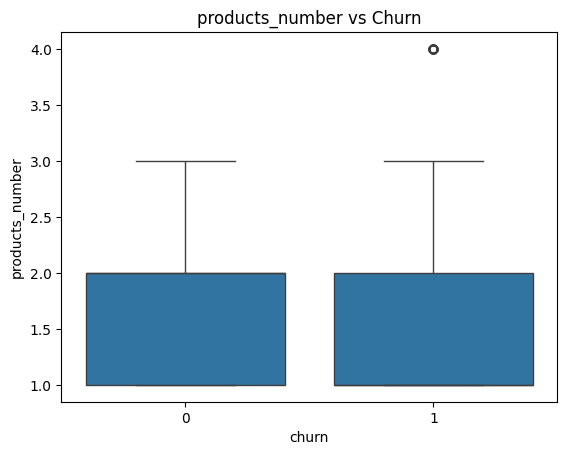

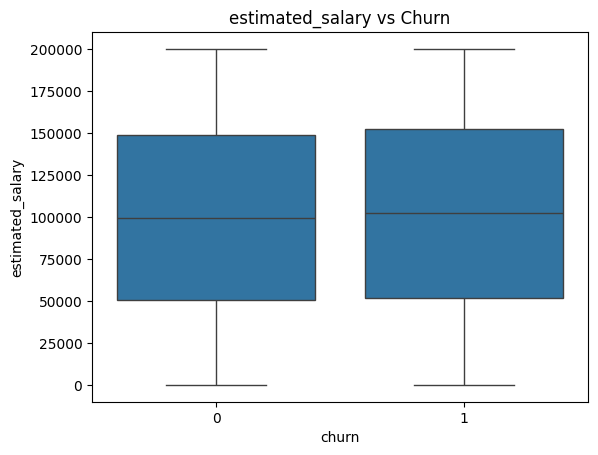

In [54]:
#Boxplots of key numeric features vs Churn
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
for col in features:
    plt.figure()
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

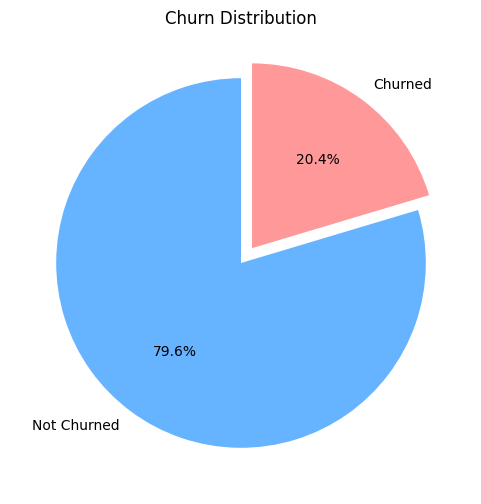

In [55]:
import matplotlib.pyplot as plt
# Count churn values
churn_counts = df['churn'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['#66b3ff', '#ff9999']
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0, 0.1))
plt.title('Churn Distribution')
plt.show()


# Step 6-Model building
Define Features and Target

In [56]:
X = df.drop('churn', axis=1)
y = df['churn']

# Split Data into Training and Testing

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Feature Scaling

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Now train the Logistic Regression model with the scaled data
# Model Training
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

# Prediction

In [59]:
y_pred_scaled = model_scaled.predict(X_test_scaled)
y_pred_scaled


array([0, 0, 0, ..., 1, 0, 0])

# Step 7- Model Evaluation

In [60]:
# Evaluate the model with scaled data
print("Classification Report (Scaled Data):\n", classification_report(y_test, y_pred_scaled))

Classification Report (Scaled Data):
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.29       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



# confusion matrix

In [61]:
print("\nConfusion Matrix (Scaled Data):\n", confusion_matrix(y_test, y_pred_scaled))


Confusion Matrix (Scaled Data):
 [[1540   53]
 [ 330   77]]


# predict churn for a new customer

In [62]:
# Create a new customer (columns must match x exactly)
new_customer = pd.DataFrame([{
    'customer_id': '123456789',
    'credit_score': 720,
    'age': 30,
    'tenure': 4,
    'balance': 45000,
    'products_number': 2,
    'credit_card': 1,
    'active_member': 1,
    'estimated_salary': 70000,
    'country_Germany': 0,
    'country_Spain': 1,
    'gender_Male': 1
}])
# Ensure correct column order
new_customer = new_customer[X.columns]
# Scale the new customer's data
new_customer_scaled = scaler.transform(new_customer)
# Predict churn
churn_prediction = model_scaled.predict(new_customer_scaled)
print("Predicted churn (0 = No, 1 = Yes):", churn_prediction[0])

Predicted churn (0 = No, 1 = Yes): 0
